 # Business Understanding 

## Business Problem
In today's competitive real estate market, "XXX Investments" faces the challenge of finding the best places to invest. With countless zip codes and fluctuating prices, the task can feel overwhelming. The goal is clear: pinpoint the top 5 zip codes with the highest potential for profit while managing risks wisely.

To tackle this challenge,XXX Investments turns to data and analysis. By studying past trends and using advanced forecasting techniques, they aim to uncover hidden opportunities in different neighborhoods. But it's not just about numbers—it's also about understanding communities, local developments, and what makes each area unique. With this approach, XXX Investments can make informed decisions that not only benefit their investors but also contribute positively to the neighborhoods they invest in. Ultimately, it's about finding the right balance between growth and stability in the ever-changing world of real estate.

## Objectives.
### Research Questions
#### Which zip codes have shown the highest historical appreciation rates for real estate prices over the past few years?
#### What is the forecasted real estate price growth trajectory for the top-performing zip codes in the near to medium term?
#### How does the volatility of real estate prices vary across different zip codes, and which areas exhibit the most stable price trends?
#### What is the risk-adjusted return potential for investments in real estate across various zip codes, considering both historical performance and forecasted future trends?

- Evaluate which county exhibits the most promising real estate investment opportunities.
- Understand the trend for the 5 best Zipcodes to invest in based on Return On Investment(ROI).
- Forecast property values over the short and long term, aiming to identify the most favourable zip codes for investment across various counties.

## Data Understanding.
- RegionID: Unique index
- RegionName: Unique Zip Code
- City: City in which the zip code is located
- State: State in which the zip code is located
- Metro: Metropolitan Area in which the zip code is located
- CountyName: County in which the zip code is located
- SizeRank: Numerical rank of size of zip code,
- 1996-04 through 2018-04:

### DATA PREPARATION.
#### Importing Necessary Libraries,Loading and Inspecting Datasets.

In [177]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("zillow_data.csv")

In [178]:
def display_dataset_info(df):
    """
    Function to display information about a dataset including info() and the first few rows visually well.
    
    Parameters:
    - df: DataFrame
        The dataset to be examined.
    """
    # Display the info of the dataset
    print("\033[1mInfo of the dataset:\033[0m")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(df.info())

    # Display the first few rows of the DataFrame
    print("\n\033[1mFirst few rows of the DataFrame:\033[0m")
    display(df.head())

# Example usage:
display_dataset_info(df)


Info of the dataset:
Number of rows: 14723
Number of columns: 272
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
None

First few rows of the DataFrame:


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

This function `display_dataset_info(df)` is designed to provide a comprehensive overview of a dataset. It takes a DataFrame `df` as input. 

- The function first prints out the number of rows and columns in the dataset using `df.shape[0]` and `df.shape[1]`.
- Then, it prints the detailed information about the dataset using `df.info()`, which includes the data types, memory usage, and non-null counts of each column.
- Finally, it displays the first few rows of the dataset in a visually well-formatted manner using `display(df.head())`.

To use this function, you would call `display_dataset_info(df)`, passing the DataFrame you want to examine as `df`.


In [179]:
def analyze_dataset(df):
    """
    Function to analyze the dataset including missing values, data types, and summary statistics.
    
    Parameters:
    - df: DataFrame
        The dataset to be analyzed.
    """
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\033[1mMissing Values:\033[0m")
    print(missing_values)
    
    # Get data types
    data_types = df.dtypes.unique()
    print("\n\033[1mUnique Data Types:\033[0m")
    print(data_types)
    
    # Compute summary statistics for numerical columns
    numeric_summary = df.describe()
    print("\n\033[1mSummary Statistics for Numerical Columns:\033[0m")
    print(numeric_summary)

# Example usage:
analyze_dataset(df)


Missing Values:
RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

Unique Data Types:
[dtype('int64') dtype('O') dtype('float64')]

Summary Statistics for Numerical Columns:
            RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
m

#### Missing Values:
- The output displays the count of missing values for each column in the dataset.
- For instance, the column `Metro` has 1043 missing values, indicating that 1043 entries in the `Metro` column are NaN or null.

#### Unique Data Types:
- This section presents the unique data types found in the dataset.
- In this case, there are three unique data types:
  - `int64`: Integer data type.
  - `O`: Object data type, often representing strings or mixed data types.
  - `float64`: Floating-point numeric data type.

#### Summary Statistics for Numerical Columns:
- Here, summary statistics for numerical columns are provided.
- The statistics include count, mean, standard deviation, minimum, maximum, and quartiles for each numerical column.
- For example, the `RegionID` column has a mean value of approximately 81075 and a standard deviation of around 31934.

This output provides essential insights into the dataset, including missing values, data types, and distribution of numerical data, which are crucial for data understanding and preprocessing.


In [180]:
df.iloc[:,0:7].nunique()

RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
CountyName     1212
SizeRank      14723
dtype: int64

#### Observations:

- The dataset contains 14722 rows and 272 colums
- Some columns in the dataset contain missing values
- Data has both continuous and categorical features comprising of the following data types; objects, integers, floats
- The dataset is in wide format with the time periods appearing as columns. We will need to convert it into long format

### Data Preparation.

In [181]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """

    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

This function `get_datetimes(df)` takes a DataFrame as input and returns only those column names that can be converted into datetime objects, treating them as datetime objects. 

- It assumes that the first column of the DataFrame is not a datetime column, so it starts converting from the second column (`df.columns.values[1:]`).
- The datetime conversion is performed using `pd.to_datetime()` function with the specified format `'%Y-%m'`.
- It returns the converted datetime columns.

Note: The number of returned columns may not match the total number of columns in the passed DataFrame.

To use this function, you would call `get_datetimes(df)`, passing the DataFrame you want to extract datetime columns from as `df`.


### Rename RegionName to ZipCode
Per the column descriptions, RegionName actually means ZipCode. For reading purposes we renamed the column to ZipCode to avoid any confusion.

In [182]:
# Rename the "RegionName" column to "ZipCode"
df = df.rename(columns={'RegionName': 'ZipCode'})

# Check the updated DataFrame
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787

In [183]:
# Check missing values in the entire dataset
total_missing_values = df.isnull().sum().sum()
print(f"Number of missing values in the entire dataset: {total_missing_values}")


Number of missing values in the entire dataset: 157934


In [184]:
import pandas as pd

def explore_and_transpose_missing_data(df):
    """
    Function to explore missing data in a DataFrame and transpose the result.
    
    Parameters:
    - df: DataFrame
        The DataFrame to explore.
    
    Returns:
    - DataFrame
        Transposed DataFrame containing columns with missing values along with their counts.
    """
    # Set option to display all columns
    pd.set_option('display.max_columns', None)
    
    def explore_missing_data(df):
        """
        Function to explore missing data in a DataFrame.
        
        Parameters:
        - df: DataFrame
            The DataFrame to explore.
        
        Returns:
        - DataFrame
            DataFrame containing columns with missing values along with their counts.
        """
        # Calculate the count of missing values for each column
        missing_data = df.isna().sum()
        
        # Filter columns with missing values (count > 0)
        missing_data = missing_data[missing_data > 0]
        
        # Convert the Series to a DataFrame
        missing_data_df = missing_data.to_frame(name='Missing Values')
        
        return missing_data_df
    
    # Call explore_missing_data function
    missing_data_df = explore_missing_data(df)
    
    # Transpose the DataFrame returned by missing_data function
    transposed_missing_data = missing_data_df.T
    
    return transposed_missing_data

# Example usage:
transposed_missing_data = explore_and_transpose_missing_data(df)
print("Columns with missing values:")
transposed_missing_data


Columns with missing values:


,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
Missing Values,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1038,1038,1038,1038,1038,1038,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,918,918,918,918,918,918,887,887,887,887,887,887,866,866,866,866,866,866,814,814,801,801,801,801,723,723,723,723,723,723,667,667,667,667,667,667,640,640,640,640,640,640,620,620,620,620,620,620,613,613,613,613,613,613,607,607,607,607,607,607,598,598,598,598,598,598,587,587,587,587,587,587,580,580,580,580,580,580,579,579,349,349,349,349,308,308,308,308,308,308,275,275,275,275,275,275,251,251,251,251,251,251,224,224,224,224,224,224,206,206,206,206,206,206,151,151,151,151,151,151,109,109,109,109,109,109,56,56,56,56,56,56


<Figure size 720x432 with 0 Axes>

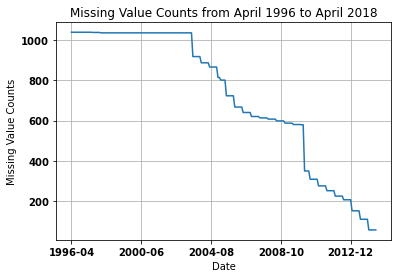

In [185]:
import matplotlib.pyplot as plt

# Extract the desired time range for missing value counts
start_date = '1996-04'
end_date = '2014-06'
missing_counts = transposed_missing_data.loc[:, start_date:end_date]

# Plot the missing value counts for each column
plt.figure(figsize=(10, 6))
missing_counts.T.plot(legend=False)
plt.title('Missing Value Counts from April 1996 to April 2018')
plt.xlabel('Date')
plt.ylabel('Missing Value Counts')
plt.grid(True)
plt.show()


The graph shows a downward trajectory, it means that the number of missing values in the specified columns decreases over time within the given range (from April 1996 to June 2014). Here's the interpretation:

- Decreasing Number of Missing Values:

A downward trajectory indicates that, over the specified time range, the dataset becomes more complete as fewer missing values are observed.
This can be a positive sign, suggesting that data collection or recording processes improved over time, resulting in fewer missing values in the dataset.

In [186]:
import pandas as pd

def clean_missing_data_ffill(df):
    """
    Function to clean missing data in a DataFrame using forward fill (ffill) method.
    
    Parameters:
    - df: DataFrame
        The DataFrame to clean.
    
    Returns:
    - DataFrame
        DataFrame with missing values filled using forward fill method.
    """
    # Apply forward fill to fill missing values
    cleaned_df = df.fillna(method='ffill')
    
    # Sanity check: Check if there are any missing values after forward fill
    if cleaned_df.isna().sum().sum() == 0:
        print("No missing values found after forward fill.")
    else:
        print("There are still missing values in the cleaned DataFrame.")
    
    return cleaned_df

# Example usage:
# Assuming df is your DataFrame
# Clean missing values using forward fill
cleaned_df = clean_missing_data_ffill(df)

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(cleaned_df)


No missing values found after forward fill.
Cleaned DataFrame:
       RegionID  ZipCode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO           Richmond   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05  

In [187]:
# checking for duplicates

print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


### Explanation of Duplicate Checking Output

The output "The data has 0 duplicates" indicates that there are no duplicate rows present in the DataFrame. This means that each row in the DataFrame is unique, and there are no exact duplicates of any row.

In summary, checking for duplicates is an essential step in the data cleaning process to ensure data quality, accuracy in analysis, and optimal performance in modeling tasks.


#### Uniformity

In [188]:
# Convert Zipcode column to string type
cleaned_df['ZipCode'] = cleaned_df['ZipCode'].astype(str)

# Ensure all zip codes are 5 digits long by adding leading zeros
cleaned_df['ZipCode'] = cleaned_df['ZipCode'].apply(lambda x: x.zfill(5))

# Output the updated DataFrame and check the minimum and maximum zip codes
print("Updated DataFrame:")
print(df)
print("Minimum Zipcode:", cleaned_df['ZipCode'].min())
print("Maximum Zipcode:", cleaned_df['ZipCode'].max())


Updated DataFrame:
       RegionID  ZipCode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO                NaN   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08  \
0           

This code first converts the 'Zipcode' column to string type since Zipcodes represent locations and so should be categorical data types. Some zipcodes have four digits and others five. The column needs to be restructured to ensure all the digits are five in number. The columns with four digits seem to be missing a zero at the beginning.Then, it uses the zfill() method to pad the zip codes with leading zeros to make them all 5 digits long. Finally, it prints the updated DataFrame and checks the minimum and maximum zip codes to verify that all zip codes are now 5 digits long.

In [189]:
#Inspecting dataframe dtypes

cleaned_df.iloc[:, :10].dtypes

RegionID        int64
ZipCode        object
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
dtype: object

## Exploratory Data Analysis.
#### Summary Statistics

In [190]:
# Summary statistics
summary_stats = cleaned_df.describe()
print("Summary Statistics:")
summary_stats


Summary Statistics:


,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e

#### Zipcode Selection
To make informed investment decisions, we will enrich our dataset by calculating a few key metrics that provide insights into the historical performance and variability of housing prices for each zip code. Here is the breakdown of the metrics we will use:

### Historical Return on Investment (ROI):
This metric provides a measure of how much the value of a property in a given zip code has appreciated (or depreciated) over the entire span of our dataset. A higher ROI indicates that properties in this zip code have historically appreciated in value at a faster rate.

### Standard Deviation of Monthly Values (std):
This metric measures the volatility or variability in monthly housing prices for each zip code over the time span of the dataset. A higher standard deviation indicates greater volatility and potential risk, but also potential reward.

### Historical Mean Value (mean):
This metric provides the average monthly housing price for each zip code over the duration of our dataset. It gives us a general sense of the typical housing price in a given zip code.

### Coefficient of Variance (CV):
The CV is a standardized measure of dispersion of a probability or frequency distribution. For our dataset, it provides a relative measure of the volatility in housing prices for each zip code. A higher CV indicates more volatility when compared to the mean.

This helps us understand the volatility in housing prices by utilising standard deviation and mean to calculate the coefficient of variance

In [191]:
# Calculate ROI (Return on Investment)
cleaned_df['ROI'] = (cleaned_df['2018-04'] / cleaned_df['1996-04']) - 1

# Calculate standard deviation (std) for each row
cleaned_df["std"] = cleaned_df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

# Calculate mean for each row
cleaned_df["mean"] = cleaned_df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# Calculate Coefficient of Variation (CV)
cleaned_df["CV"] = cleaned_df['std'] / cleaned_df["mean"]

cleaned_df[['ZipCode','ROI','mean','std','CV']]



,ZipCode,ROI,mean,std,CV
0,60657,2.083782,743978.867925,190821.103965,0.256487
1,75070,0.365295,219655.849057,33537.101427,0.152680
2,77494,0.567966,262110.566038,37730.794353,0.143950
3,60614,1.623971,974139.245283,231225.944628,0.237364
4,79936,0.571798,101875.471698,18167.079218,0.178326
...,...,...,...,...,...
14718,01338,1.212474,165064.150943,38411.628676,0.232707
14719,03293,1.435814,162661.886792,49298.400500,0.303073
14720,40404,1.336252,97273.584906,17772.324320,0.182705
14721,81225,2.476714,483997.358491,136538.282291,0.282105


# Identifying Top Investment Opportunities

To identify top investment opportunities, we will follow these steps:

1. **Examine Coefficient of Variance (CV)**: We will analyze the CV for each zip code to understand the volatility or variability of housing prices. A higher CV indicates greater volatility.

2. **Set Upper Limit for CV**: Using the 60th percentile of CV values as a threshold, we will set an upper limit for acceptable risk. This helps filter out zip codes with higher-than-acceptable risk levels.

3. **Identify Promising Zip Codes**: We will then identify zip codes that offer the best historical Return on Investment (ROI) while also fitting within the defined risk profile. These zip codes represent top investment opportunities that combine favorable ROI with acceptable risk levels.


In [192]:
# Descriptive statistics of coefficients of variance.
print(cleaned_df.CV.describe())

# Define upper limit of CV according to risk profile.
upper_cv = cleaned_df.CV.quantile(.6)
print(f'\nCV upper limit: {upper_cv}')

# Get the first 10 zipcodes with highest ROIs within the firms risk profile.
top_10 = cleaned_df[cleaned_df['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:10]

print('\n Best 10 ZipCodes:')
top_10[['ZipCode','ROI','CV']]


count    14723.000000
mean         0.237996
std          0.100052
min          0.041275
25%          0.167760
50%          0.227705
75%          0.287949
max          1.701296
Name: CV, dtype: float64

CV upper limit: 0.24982540692396077

 Best 10 ZipCodes:


,ZipCode,ROI,CV
12369,16038,3.359073,0.249678
13314,49309,3.353982,0.231683
13356,40107,3.018970,0.231908
12963,48822,2.963519,0.213312
10690,49265,2.931034,0.232729
12238,49425,2.903614,0.230111
8353,29645,2.883333,0.232148
9541,80816,2.811060,0.244854
13812,37325,2.810169,0.246882
13238,58012,2.789675,0.241399


## Observation

- The average CV across all zip codes is approximately 0.240
- Based on our risk tolerance, the upper CV limit was set at 0.250
- The top 10 zip codes showcase high ROIs while also aligning with the firm's risk profile

In [193]:
# Get the 10 zipcodes with highest ROIs within the firm's risk profile
top_10 = cleaned_df[cleaned_df['CV'] < upper_cv].sort_values('ROI', axis=0, ascending=False)[:10]

# Get Location Names for the best 10 zipcodes
best10_zipcodes = list(top_10.ZipCode.values)
for i in best10_zipcodes:
    city = cleaned_df[cleaned_df['ZipCode'] == i].City.values[0]
    state = cleaned_df[cleaned_df['ZipCode'] == i].State.values[0]
    print(f'ZipCode: {i} \nLocation: {city}, {state}\n')


ZipCode: 16038 
Location: Marion, PA

ZipCode: 49309 
Location: Bitely, MI

ZipCode: 40107 
Location: Boston, KY

ZipCode: 48822 
Location: Eagle, MI

ZipCode: 49265 
Location: Onsted, MI

ZipCode: 49425 
Location: Holton, MI

ZipCode: 29645 
Location: Gray Court, SC

ZipCode: 80816 
Location: Florissant, CO

ZipCode: 37325 
Location: Delano, TN

ZipCode: 58012 
Location: Casselton, ND



#### Convert the dataset into time series

A copy of the dataset will be created and converted into long view while preserving df as a wide view for EDA. Both the long and wide will be relevant for EDA.
 Now, you have two separate DataFrames: cleaned_df, which contains your original data, and new_df, which is a copy of cleaned_df. You can use new_df for further processing, such as converting it into a long format for analysis while preserving df for exploratory data analysis (EDA).

In [194]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(top_10):
    melted = pd.melt(top_10, id_vars=['RegionID','ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 
                                  'ROI', 'CV' ,'std','mean'], var_name='Date',value_name='median_houseprice')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['median_houseprice'])
    return melted

In [197]:
# Create a copy of the cleaned DataFrame with a new name (e.g., new_df)
new_df = top_10.copy()

# Apply the melt_df function to convert the DataFrame from wide to long format
melted_df = melt_df(new_df)

# Converting the 'Date' column to datetime format
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%m/%y')

# Set the 'Date' column as the index
melted_df.set_index('Date', inplace=True)

# Rename the 'value' column to 'median_houseprice'
melted_df.rename(columns={"value": "median_houseprice"}, inplace=True)

# Display the final cleaned data
melted_df.head()


,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,ROI,CV,std,mean,median_houseprice
Date,,,,,,,,,,,,
1996-04-01,64420,16038,Marion,PA,Pittsburgh,Butler,12370,3.359073,0.249678,20531.814538,82233.207547,25900.0
1996-04-01,79678,49309,Bitely,MI,Baltimore,Newaygo,13315,3.353982,0.231683,8755.699818,37791.698113,11300.0
1996-04-01,75522,40107,Boston,KY,Bardstown,Nelson,13357,3.018970,0.231908,21638.431224,93306.037736,36900.0
1996-04-01,79397,48822,Eagle,MI,Lansing,Clinton,12964,2.963519,0.213312,30813.609976,144453.207547,46600.0
1996-04-01,79648,49265,Onsted,MI,Adrian,Lenawee,10691,2.931034,0.232729,28923.199467,124278.490566,40600.0


In [198]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [200]:
# Check column names and data types
print(melted_df.columns)
print(melted_df.dtypes)

Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'ROI', 'CV', 'std', 'mean', 'median_houseprice'],
      dtype='object')
RegionID               int64
ZipCode               object
City                  object
State                 object
Metro                 object
CountyName            object
SizeRank               int64
ROI                  float64
CV                   float64
std                  float64
mean                 float64
median_houseprice    float64
dtype: object


## EDA.

4.1 Distribution of Property Values for top 10 Zip codes.

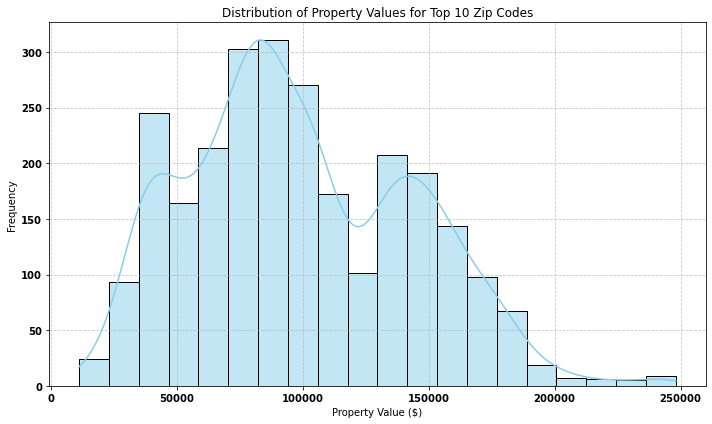

In [202]:
# Visualizing the distribution of property values for top 10 zip codes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=melted_df, x='median_houseprice', bins=20, kde=True, color='skyblue')
plt.xlabel('Property Value ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Values for Top 10 Zip Codes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The distribution of real estate values is right-skewed, indicating that most properties have lower values, while a few properties have much higher values. This is evident from the long tail on the right side of the distribution plot.


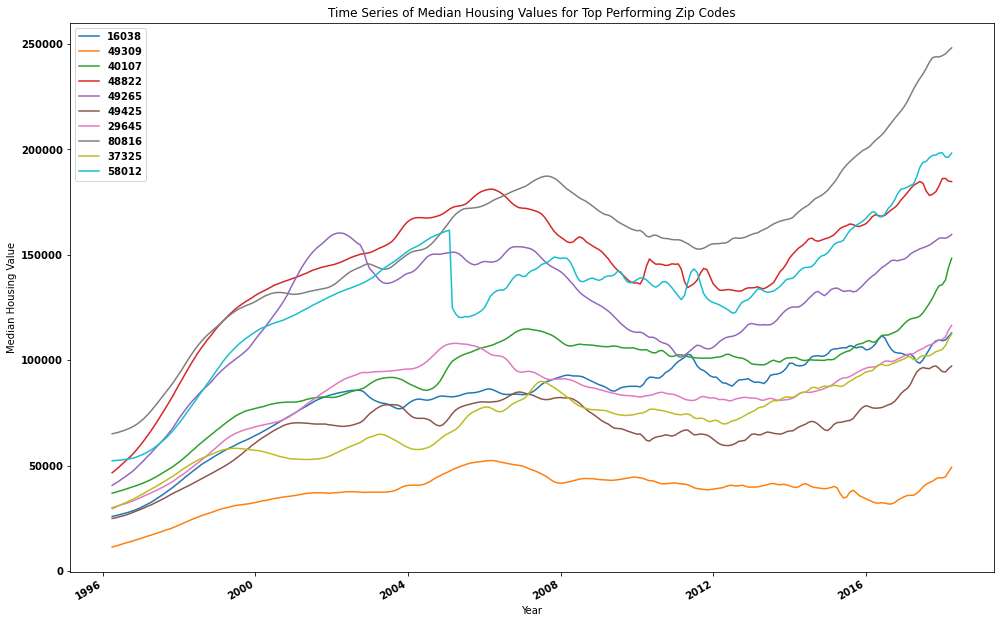

In [204]:
# Pivot the data to get median values for each zip code
pivot_df = melted_df.pivot_table(index='ZipCode', columns=melted_df.index, values='median_houseprice', aggfunc='median')

# Sort zip codes by ROI in descending order
top_performers = melted_df.groupby('ZipCode')['ROI'].median().sort_values(ascending=False).head(10)

# Plot the top 10 performing zip codes
plt.figure(figsize=(14, 10))
for zipcode in top_performers.index:
    plt.plot(pivot_df.columns, pivot_df.loc[zipcode], label=zipcode)
plt.xlabel('Year')
plt.ylabel('Median Housing Value')
plt.title('Time Series of Median Housing Values for Top Performing Zip Codes')
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()


### Observations from Time Series Plot of Median Housing Values

- The plot displays historical trends in property values for each zip code.
- Some zip codes exhibit steady appreciation over time, indicating a stable housing market.
- Other zip codes demonstrate more volatility or distinct growth phases, suggesting fluctuations in property values.
- Notable dips in property values are observed around the years 2008-2012, coinciding with the global financial crisis.
- Following this period, there is a visible recovery and subsequent steady growth in property values for most zip codes.


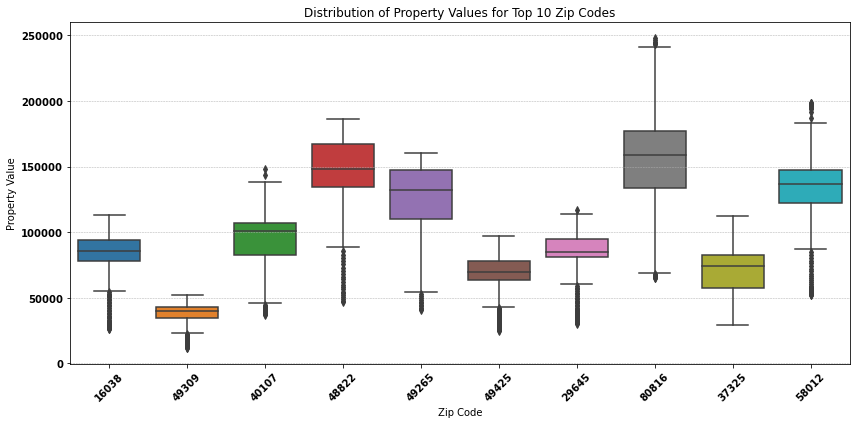

In [206]:
# Box Plot for distribution of property values for top 10 zip codes
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='ZipCode', y='median_houseprice')
plt.title('Distribution of Property Values for Top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Property Value')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Return On Investment for top 10 zipcodes

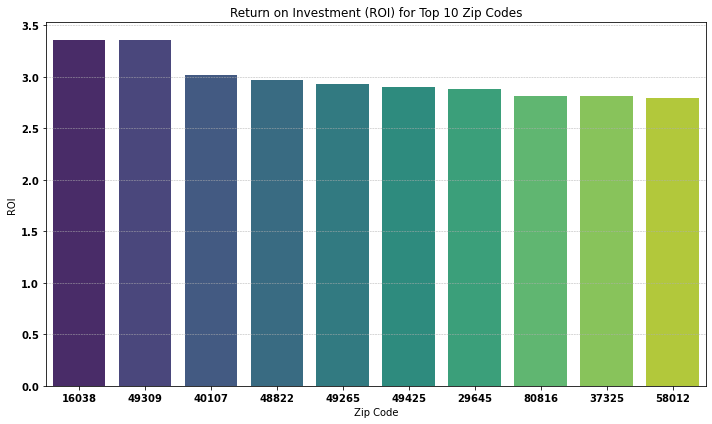

In [208]:
# Bar Plot to compare ROI for top 10 zip codes
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='ZipCode', y='ROI', palette='viridis')
plt.title('Return on Investment (ROI) for Top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('ROI')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


From this visualization, we can infer that Zipcode 49309 and 16038 has yielded the highest ROI over the years, followed by 40107.

 #### Scatter Plot  ROI vs. Coefficient of Variance (CV) for top 10 Zip Codes

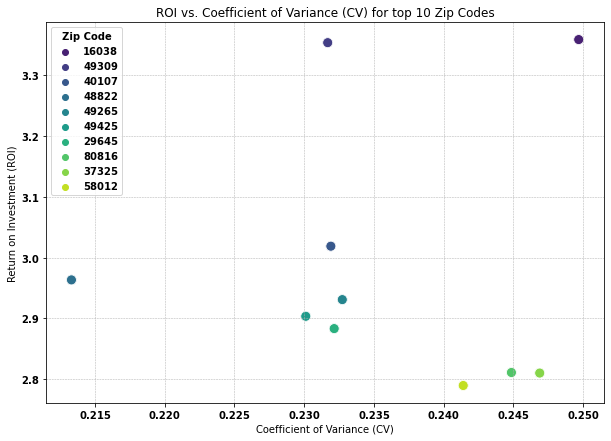

In [209]:
# Scatter Plot to show relationship between ROI and CV for top 10 zip codes

plt.figure(figsize=(10, 7))
sns.scatterplot(data=melted_df, x='CV', y='ROI', hue='ZipCode', s=100, palette='viridis', legend='full')
plt.title('ROI vs. Coefficient of Variance (CV) for top 10 Zip Codes')
plt.xlabel('Coefficient of Variance (CV)')
plt.ylabel('Return on Investment (ROI)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Zip Code')
plt.show()

The scatter plot provides insights into the trade-off between risk (volatility in property values) and return (historical appreciation). Zip codes closer to the top-left corner offer higher ROI with lower risk, making them more desirable for investment.